# 🏥 No-Show Appointments Analysis

This project analyzes a real-world dataset of medical appointments to identify factors associated with patients missing their appointments. The goal is to uncover trends and patterns that can help healthcare providers reduce no-show rates.

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings ('ignore')

### Data Loading

In [5]:
# Load the dataset
data = pd.read_csv("noshowappointments.csv")

### Data Overview

In [7]:
# Checking for data types and missing values
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# Basic Statistics
data.describe ()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Viewing sample rows

In [10]:
data.head ()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Check for null and duplicate values (Data Cleaning)

In [12]:
data.isnull ().sum ()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [13]:
data.duplicated ().sum ()

0

### Check columns for any inconsistencies

In [15]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [16]:
data.rename (columns = {'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap', 'No-show' : 'No_Show'}, inplace = True)

In [17]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show'],
      dtype='object')

### Exploratory Data Analysis (Count, percentage, and visualization of No_Show values)

In [19]:
data ['No_Show'].value_counts()

No_Show
No     88208
Yes    22319
Name: count, dtype: int64

In [20]:
data ['No_Show'].value_counts(normalize = True)

No_Show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

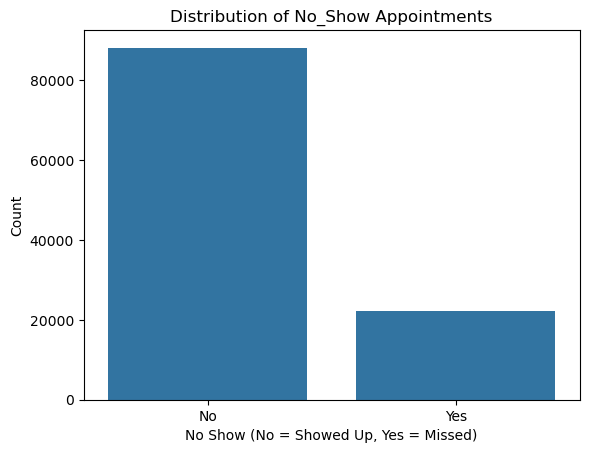

In [21]:
sns.countplot (x = 'No_Show', data = data)
plt.title ('Distribution of No_Show Appointments')
plt.xlabel ('No Show (No = Showed Up, Yes = Missed)')
plt.ylabel ('Count')
plt.show ()

In [22]:
data ['No_Show'].unique ()

array(['No', 'Yes'], dtype=object)

### Column-wise No-Show Analysis

### No-show rate by gender

In [25]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show'],
      dtype='object')

In [26]:
gender_no_show  = data.groupby('Gender')['No_Show'].value_counts (normalize = True).unstack ()
gender_no_show

No_Show,No,Yes
Gender,,
F,0.796854,0.203146
M,0.800321,0.199679


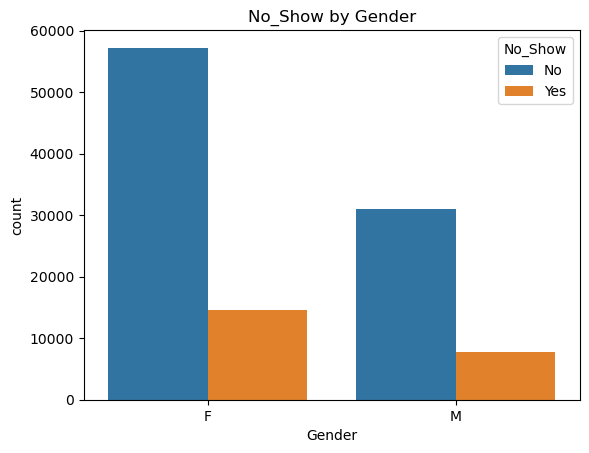

In [27]:
sns.countplot(x = 'Gender', hue = 'No_Show', data = data)
plt.title ('No_Show by Gender')
plt.show ()

### No_Show rate by Age Groups

In [29]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show'],
      dtype='object')

### Create Age Bins

In [31]:
bins = [0, 12, 18, 35, 50, 65, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Mid Age', 'Senior']
data ['Age_Group'] = pd.cut (data['Age'], bins = bins, labels = labels)

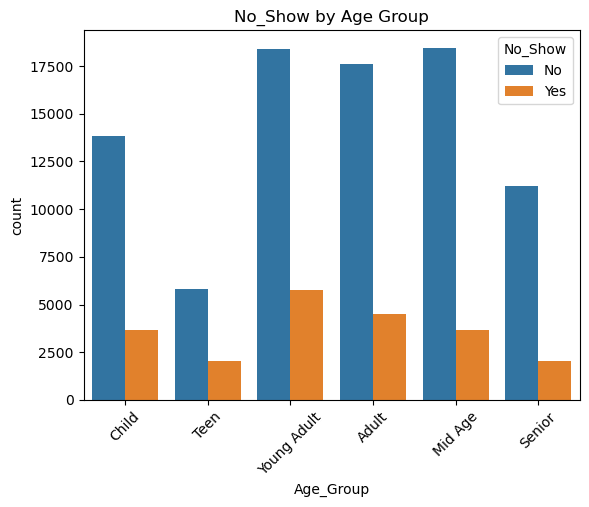

In [32]:
sns.countplot(x = 'Age_Group', hue = 'No_Show', data = data)
plt.title ("No_Show by Age Group")
plt.xticks (rotation = 45)
plt.show ()

### No_Show vs SMS Received

In [34]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show',
       'Age_Group'],
      dtype='object')

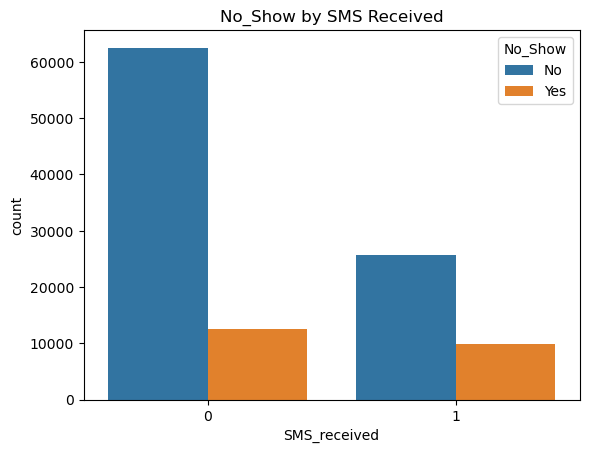

In [35]:
sns.countplot(x = 'SMS_received', hue = 'No_Show', data = data)
plt.title('No_Show by SMS Received')
plt.show ()

### No_Show vs Scholarship

In [37]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show',
       'Age_Group'],
      dtype='object')

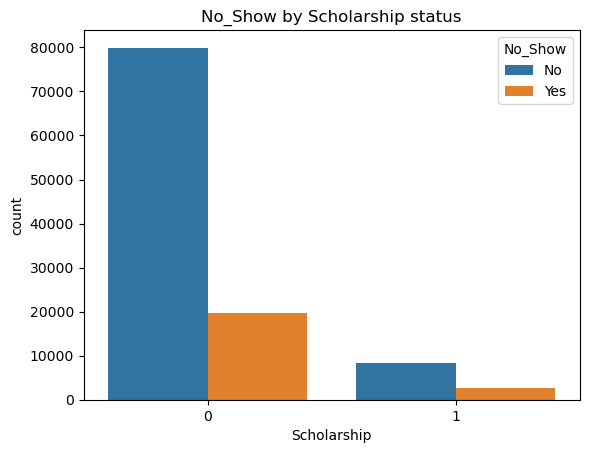

In [38]:
sns.countplot(x = 'Scholarship', hue = 'No_Show', data = data)
plt.title('No_Show by Scholarship status')
plt.show ()

### No_Show vs Hypertension

In [40]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show',
       'Age_Group'],
      dtype='object')

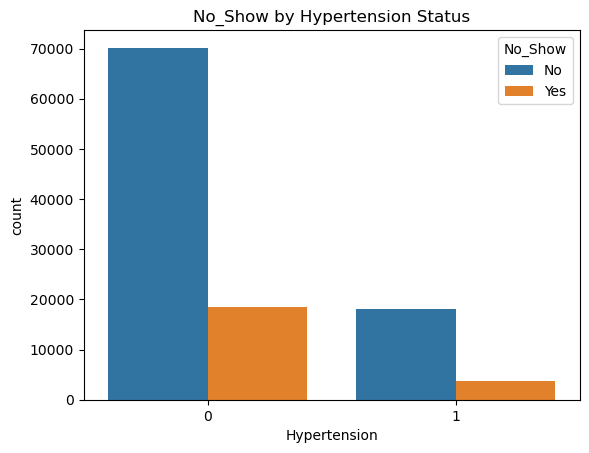

In [41]:
sns.countplot(x = 'Hypertension', hue = 'No_Show', data = data)
plt.title('No_Show by Hypertension Status')
plt.show ()

### No_Show Vs Diabetes

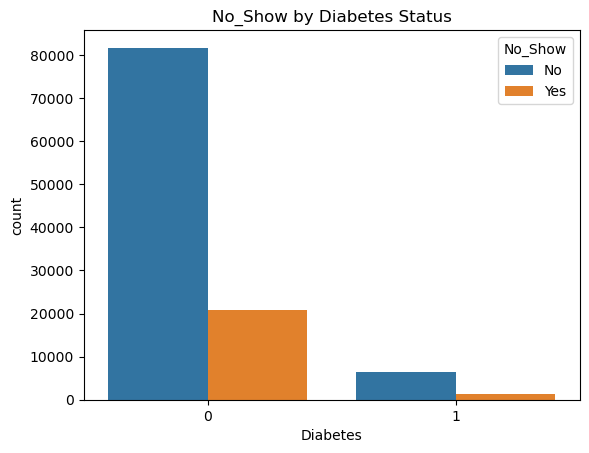

In [43]:
sns.countplot(x = 'Diabetes', hue = 'No_Show', data = data)
plt.title('No_Show by Diabetes Status')
plt.show ()

### No_Show vs Alcoholism

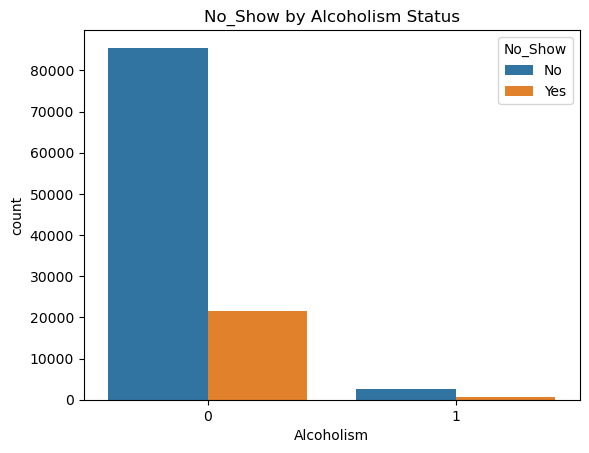

In [45]:
sns.countplot(x = 'Alcoholism', hue = 'No_Show', data = data)
plt.title('No_Show by Alcoholism Status')
plt.show ()

### No_Show vs Handicap status

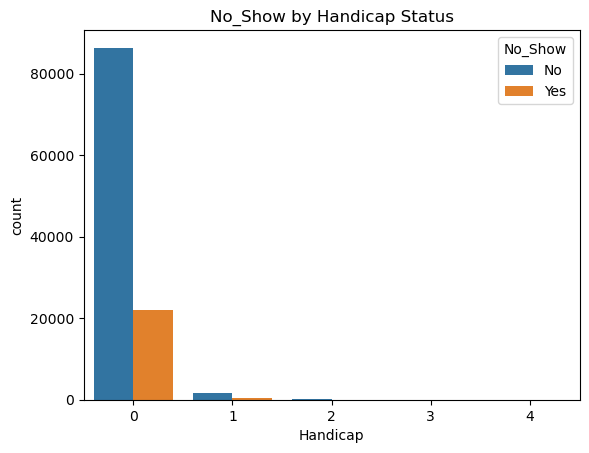

In [47]:
sns.countplot(x = 'Handicap', hue = 'No_Show', data = data)
plt.title('No_Show by Handicap Status')
plt.show ()

### Time-Based Feature: Days between Scheduling and Appointment

###### Patients may not show up if the appointment is too far in the future

#### Step-1 Convert dates to datetime

In [51]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show',
       'Age_Group'],
      dtype='object')

In [52]:
data ['ScheduledDay'] = pd.to_datetime(data ['ScheduledDay'])
data ['ScheduledDay']

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [53]:
data ['AppointmentDay'] = pd.to_datetime (data ['AppointmentDay'])
data ['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns, UTC]

### Create a new column

In [55]:
data ['Wait_Days'] =  (data ['AppointmentDay'] - data ['ScheduledDay']).dt.days
data ['Wait_Days']

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: Wait_Days, Length: 110527, dtype: int64

### No_Show vs Wait Time Relationship

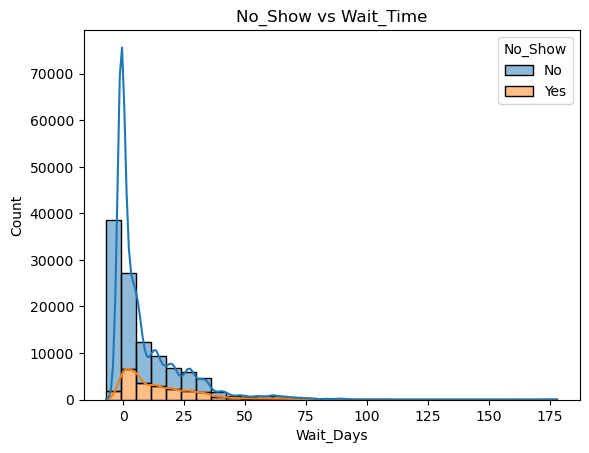

In [57]:
sns.histplot (data = data, x = 'Wait_Days', hue = 'No_Show', bins = 30, kde = True, multiple = 'stack')
plt.title ('No_Show vs Wait_Time')
plt.show ()

### Correlation Matrix

##### See if there are strong relationships

In [60]:
numeric_cols = ['Age', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Scholarship', 'Wait_Days']
data_numeric = data [numeric_cols].copy ()
data_numeric['No_Show'] = data ['No_Show'].map ({'No': 0, 'Yes': 1})
data_numeric['No_Show']

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No_Show, Length: 110527, dtype: int64

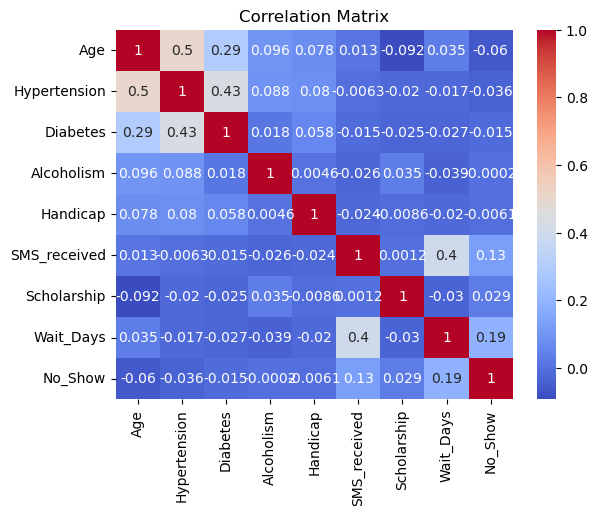

In [61]:
corr = data_numeric.corr ()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title ('Correlation Matrix')
plt.show ()

### Create Weekdays and Wait_Days columns

In [63]:
data['ScheduledWeekday'] = data['ScheduledDay'].dt.day_name()
data['ScheduledWeekday']

0            Friday
1            Friday
2            Friday
3            Friday
4            Friday
            ...    
110522      Tuesday
110523      Tuesday
110524    Wednesday
110525    Wednesday
110526    Wednesday
Name: ScheduledWeekday, Length: 110527, dtype: object

In [64]:
data['AppointmentWeekday'] = data['AppointmentDay'].dt.day_name()
data['AppointmentWeekday']

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
110526    Tuesday
Name: AppointmentWeekday, Length: 110527, dtype: object

In [65]:
data[['ScheduledDay', 'AppointmentDay', 'ScheduledWeekday', 'AppointmentWeekday', 'Wait_Days']].head()

,ScheduledDay,AppointmentDay,ScheduledWeekday,AppointmentWeekday,Wait_Days
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,-1


In [66]:
print("Negative wait days count:", (data['Wait_Days'] < 0).sum())

Negative wait days count: 38568


In [67]:
data = data[data['Wait_Days'] >= 0].copy()
data.head (5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Age_Group,Wait_Days,ScheduledWeekday,AppointmentWeekday
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,Senior,1,Wednesday,Friday
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Young Adult,1,Wednesday,Friday
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Adult,1,Wednesday,Friday
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,Young Adult,1,Wednesday,Friday
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,Young Adult,1,Wednesday,Friday


In [68]:
print("Data shape after removing invalid wait days:", data.shape)

Data shape after removing invalid wait days: (71959, 18)


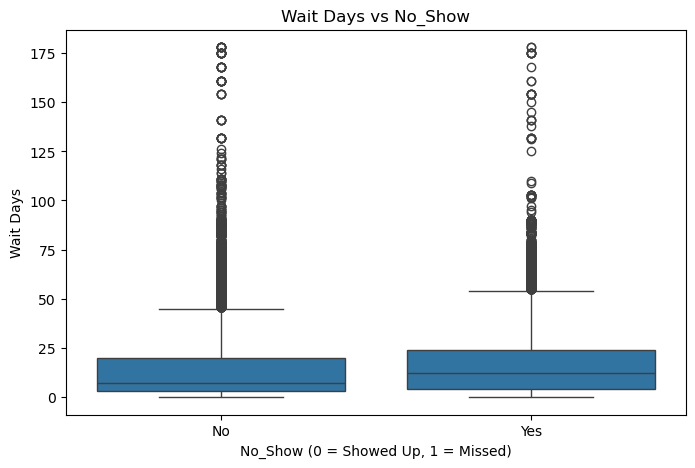

In [69]:
plt.figure(figsize=(8,5))
sns.boxplot(x='No_Show', y='Wait_Days', data=data)
plt.title('Wait Days vs No_Show')
plt.xlabel('No_Show (0 = Showed Up, 1 = Missed)')
plt.ylabel('Wait Days')
plt.show()

### Distribution Insight

Text(0.5, 1.0, 'Distribution of Wait Days by No_Show Status')

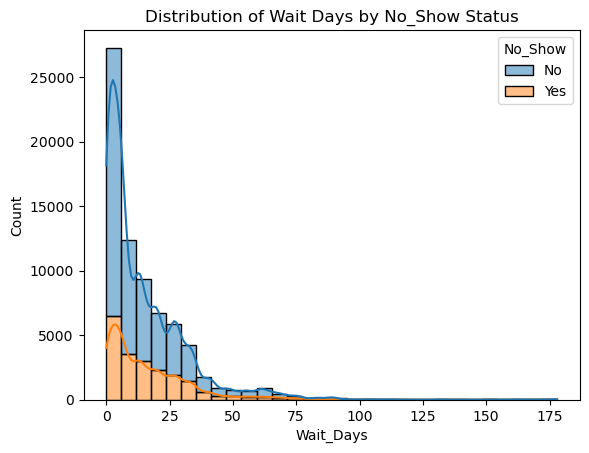

In [71]:
sns.histplot(data=data, x='Wait_Days', hue='No_Show', bins=30, kde=True, multiple='stack')
plt.title('Distribution of Wait Days by No_Show Status')

### Group Analysis (Show vs Missed by Wait Days Range)

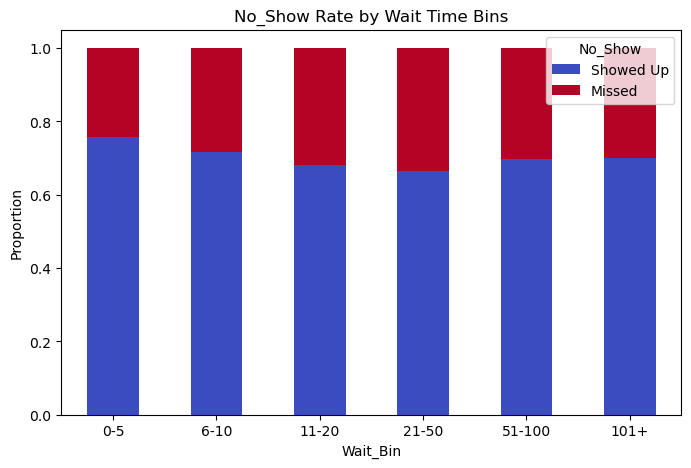

In [73]:
# Bin wait days into ranges
data['Wait_Bin'] = pd.cut(data['Wait_Days'], bins=[0, 5, 10, 20, 50, 100, 200], 
                          labels=['0-5', '6-10', '11-20', '21-50', '51-100', '101+'])

# Grouped no-show rate by wait bin
grouped = data.groupby('Wait_Bin')['No_Show'].value_counts(normalize=True).unstack()

grouped.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title('No_Show Rate by Wait Time Bins')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='No_Show', labels=['Showed Up', 'Missed'])
plt.show()

### Conclusion

1. Longer Wait_Days are associated with slightly higher no-show rates (correlation: 0.19).
2. 
Patients receiving Scholarships and SMS reminders also show a mild tendency to miss appointments
3. 
Older patients are slightly more likely to attend appointment

.
These insights can help clinics prioritize reminders and adjust scheduling practices.